No handles with labels found to put in legend.


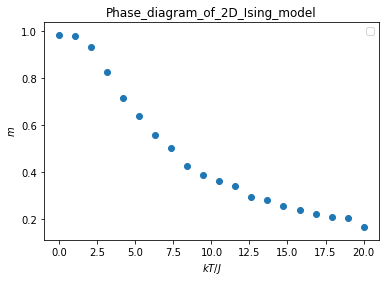

In [3]:
import numpy as np
import matplotlib.pyplot as plt

n = 10000     # number of steps
k= 1         # Boltzmann constant
N = 10        # N*N lattice 
J = 1         # Interaction constant
TF = 20       # temperature range from 0 to TF
NT = 20       # number of different temperatures

# define a function to calculate the Hamiltonian of a given spin configuration S
def H(S): 
    HH = 0
    for i in range (N):
        for j in range (N):
            a = i +1
            b = i-1
            c = j+1
            d = j-1
            if i == N-1:
                a = 0
            if i == 0:
                b = N-1
            if j == N -1:
                c = 0
            if j == 0:
                d = N-1
            HH = HH + S[a][c] + S[a][d] + S[b][c] + S[b][d]
    HH = -J * HH
    return HH

def m(S):  # define a function to calculate magnetization 
    m = 0
    for i in range (N):
        for j in range (N):
            m  = m +S[i][j]
    m = m / (N*N)
    return m
    
def MAG(T): # the MC function 
    S =np.linspace(-1,-1,N*N) # initial value of spin configuration
    S.shape = N,N
    
    mm = 0
    S0 = S.copy()
    
    for i in range (n):
        S0 = S.copy() # if write as S0 = S, they will share memory in computer
        # randomly chose a site to flip 
        Q = N*np.random.random_sample()
        Q = np.floor(Q)
        Q = Q.astype(int)
        W = N*np.random.random_sample()
        W = np.floor(W)
        W = W.astype(int)
        S[Q][W] = -S[Q][W]
        
        D = H(S) - H(S0)
        rand = np.random.random_sample()
        if D <= 0 :
            S = S.copy()
        elif np.e**(-D/(k*T)) < rand:
            S = S0.copy()
            
        mm = mm + m(S0)
    
    mm = mm / n 
    return mm

TEM = np.linspace(1e-3, TF, NT)
mmm = np.linspace(1e-3, TF, NT)
# calculate magnetization at different temperature
for i in range (NT):
    mmm[i] = MAG (TEM[i])
    
plt.scatter(TEM,mmm)
plt.xlabel('$kT/J$')
plt.ylabel('$m$')
plt.title('Phase_diagram_of_2D_Ising_model')
plt.legend()
plt.show()

In [23]:
np.int16(3.6)

3

In [24]:
np.int16(3.2)

3

In [26]:
np.int16(np.random.random_sample())

0

In [18]:
N = 70
W = N*np.int16(np.random.random_sample()) #这一步先取了0和1之间的随机数,然后又取成了整数, 但是取整数的话, 就都取成 0 了
print(W)
W = np.int16(np.floor(W))
print(W)
w = np.int16(W.astype(int))
print(W)

0
0
0


In [20]:
N = 70
W = N*np.random.random_sample()
print(W)
W = np.floor(W)
print(W)
W = W.astype(int)
print(W)

20.517319623668723
20.0
20


In [13]:
print(N)

7


In [22]:
np.random.random_sample()

0.4130943923711703